<a href="https://colab.research.google.com/github/JonathanLooman/Financial-Analysis-for-algorithmic-trading/blob/master/Testing_For_Normality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing if a Distribution is Normal

When searching for alpha in trading stratgies it is useful to use statistical checks to determine whether the stratagy is generating profit (i.e. wether profit mean >0). However, many of these statistical tests auume normality. Therefore it is essential to determine whether a distribution is normal before choosing an appropriate statistical test. 
This excercise in testing Normality was done as part of the Udacity, AI for trading nanodegree program.



In [0]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

## Create normal and non-normal distributions

In [0]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale = 1.0, size=(1000,))

# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))


# Boxplot-Whisker Plot and Histogram
We can visually check if a distribution looks normally distributed. A box and whisker plot checks for symmetry around the mean. A histogram lets us see the overall shape. A QQ-plot lets us compare our data distribution wit a normal distribution.

Text(0.5, 1.0, 'Boxplot of Normal Distribution')

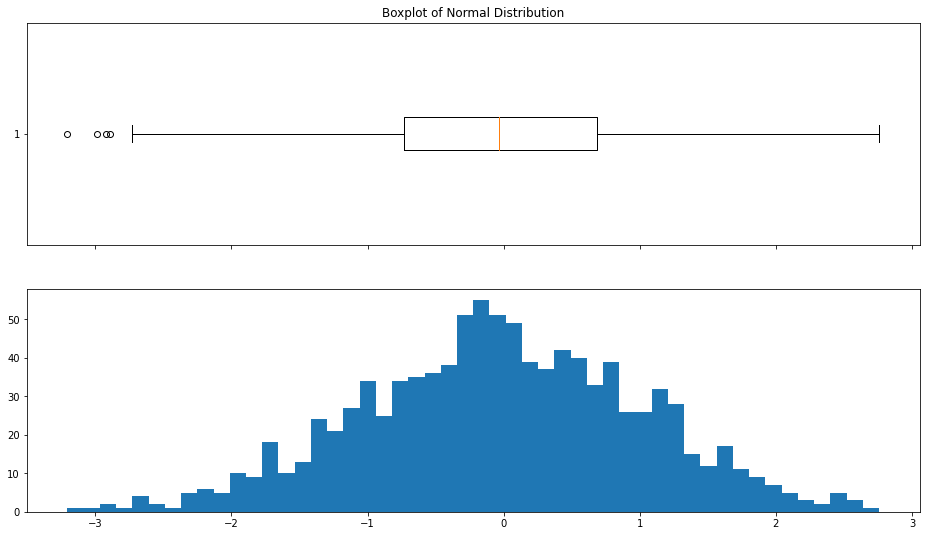

In [3]:
# sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size = (1000,))
fig, axes = plt.subplots(2,1,  figsize = (16,9), sharex=True)
axes[0].boxplot(sample_a, vert=False)
axes[1].hist(sample_a, bins=50)
axes[0].set_title('Boxplot of Normal Distribution')

Text(0.5, 1.0, 'Boxplot of Lognormal Distribution')

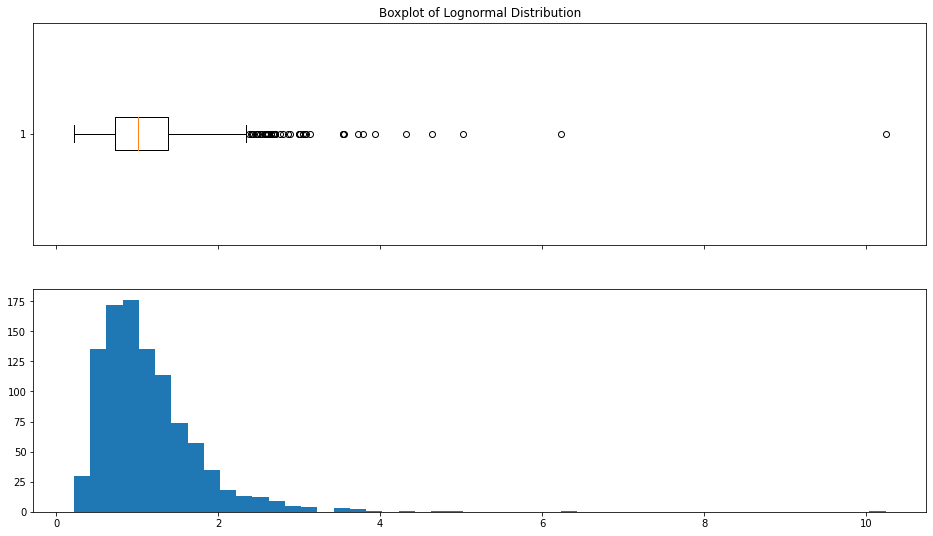

In [4]:
#sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))
fig,axes = plt.subplots(2,1, figsize=(16,9), sharex=True)
axes[0].boxplot(sample_b, vert=False)
axes[1].hist(sample_b,bins=50)
axes[0].set_title('Boxplot of Lognormal Distribution')

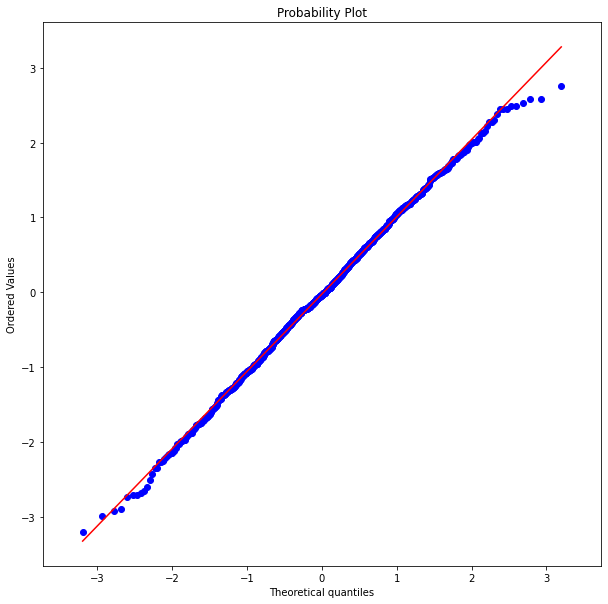

In [5]:
# Q-Q plot of normally-distributed sample
plt.figure(figsize=(10,10)); plt.axis('equal')
stats.probplot(sample_a, dist='norm', plot=plt);

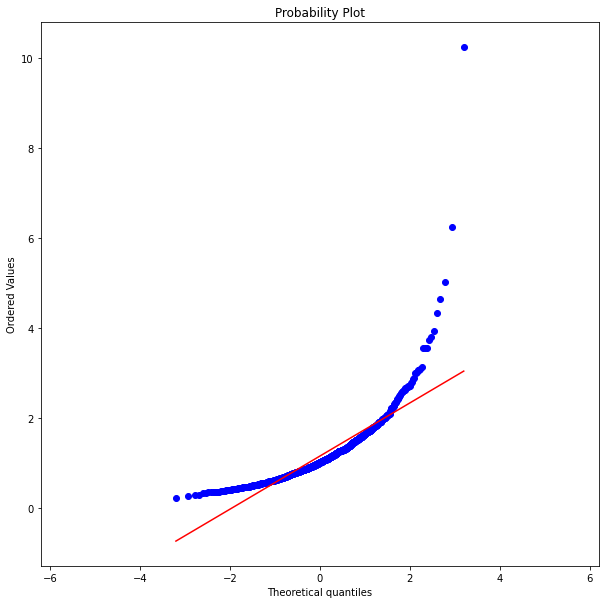

In [6]:
#Q-Q plot of non-normally-distributed sample
plt.figure(figsize=(10,10))
plt.axis('equal')
stats.probplot(sample_b, dist='norm', plot=plt);

# Testing for Normality

## Shapiro-Wilk

The Shapiro-Wilk test is available in the scipy libraru. The null hupothesis assumes that the data is normally distributed. If the p-value is greater that alpha, then assume that the distribution is normal. 
Documentation for the scipy library on the Shapiro-Wilk test can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [7]:
def is_normal(sample, test=stats.shapiro, p_level=0.05):
  """
  Apply a normality test to check if sample is normally distributed.
  """
  t_stat, p_value = test(sample)
  p_value=p_value*2
  print(f"Test statistic: {t_stat}, p_value: {p_value}")
  print(f"Is the distribution likely normal? {p_value>p_level}")
  return p_value > p_level

#Using the Shapiro-Wilk test (default)
print("Sample A:-"); is_normal(sample_a);
print("Sample B:-"); is_normal(sample_b);

Sample A:-
Test statistic: 0.9981769919395447, p_value: 0.7296876907348633
Is the distribution likely normal? True
Sample B:-
Test statistic: 0.7576767802238464, p_value: 1.3180300720146645e-35
Is the distribution likely normal? False


## Kolmogorov-Smirnov

The Kolmogorov is avaliable in th scipy.stats library. The K-S test coapres the data distribution with a theoretical distribution. For the theoretical distribution, 'norm' (normal) distribution will be used. It is necessary to specify the mean and standard distribution. We'll set the mean and stanadard deviation of the theoretical norm with the mean and standard deviation of the data distribution.

Documentation for the Kolmogorov is avaliable in th scipy.stats library here: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [0]:
def is_normal_ks(sample, test = stats.kstest, p_level=0.05, **kwargs):
  """
  sample: a sample distribution.
  test: a fucntion that tests for normality.
  p_level: if the test returns a p-value > p-level, assumes normality

  return: True if normally distribution is normal, False otherwise.

  Hypothesis of test:
  Null Hypothesis: the distrubution is normally distributed.
  Alternative_ Hypothesis: The distribution is not normally distributed.
  """
  normal_args = (np.mean(sample), np.std(sample))

  t_stat, p_value = test(sample, 'norm', normal_args, **kwargs)
  
  print(f"Test statistic: {t_stat}, p_value: {p_value}")
  print(f"Is the distribution likley normal: {p_value>p_level}")

  return p_value>p_level

In [9]:
# Using Kolmogorov-Smirnov test
print("Sample A:-"); is_normal_ks(sample_a);
print("Sample B:-"); is_normal_ks(sample_b);

Sample A:-
Test statistic: 0.021598742858169873, p_value: 0.7392974552905138
Is the distribution likley normal: True
Sample B:-
Test statistic: 0.12372340661119163, p_value: 8.443227466819262e-14
Is the distribution likley normal: False
